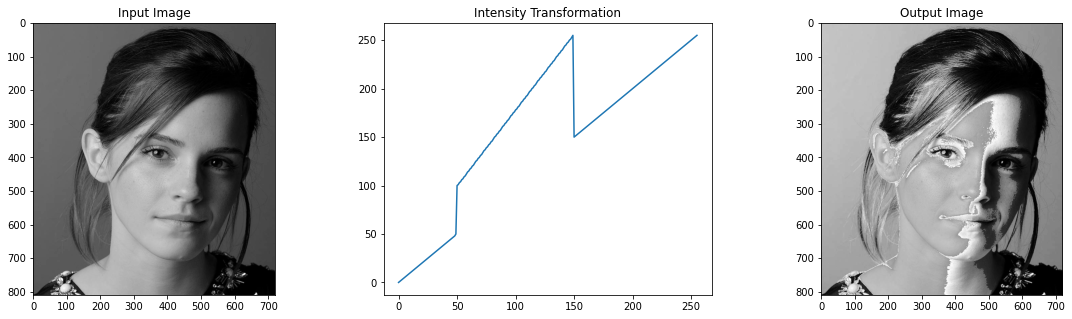

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

transform = np.concatenate((np.linspace(0, 50, 50), np.linspace(100, 255, 100), np.linspace(150, 255, 106)), axis=0).astype(np.uint8)

im = cv.imread(r"emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert im is not None
im_transformed = cv.LUT(im, transform)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(im, cmap = "gray", vmin=0, vmax=255)
ax[0].set_title("Input Image")
ax[1].plot(transform)
ax[1].set_title("Intensity Transformation")
ax[2].imshow(im_transformed, cmap = "gray", vmin=0, vmax=255)
ax[2].set_title("Output Image")

plt.show()

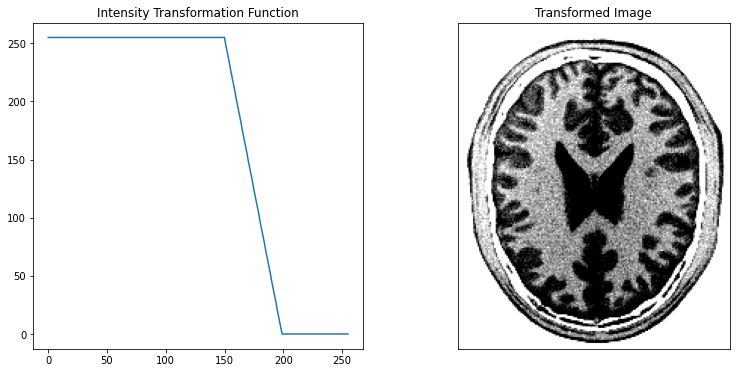

In [3]:
transform2 = np.concatenate((np.linspace(255, 255, 150), np.linspace(255, 0, 50), np.linspace(0, 0, 56)), axis=0).astype(np.uint8)
fig2 = cv.imread("brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

fig2_transformed_1 = cv.LUT(fig2, transform2)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ax[0].plot(transform2)
ax[0].set_title("Intensity Transformation Function")
ax[1].imshow(fig2_transformed_1, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Transformed Image")

plt.show()

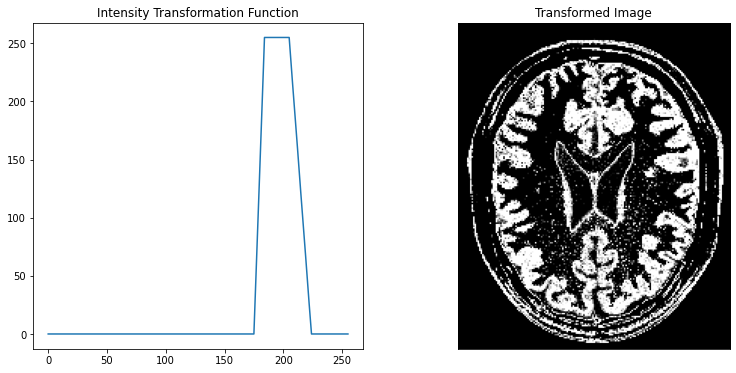

In [4]:
transform3 = np.concatenate((np.linspace(0, 0, 175), np.linspace(0, 255, 10), np.linspace(255, 255, 20), np.linspace(255, 0, 20), np.linspace(0, 0, 31)), axis=0).astype(np.uint8)

fig2_transformed_2 = cv.LUT(fig2, transform3)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ax[0].plot(transform3)
ax[0].set_title("Intensity Transformation Function")
ax[1].imshow(fig2_transformed_2, cmap="gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Transformed Image")

plt.show()

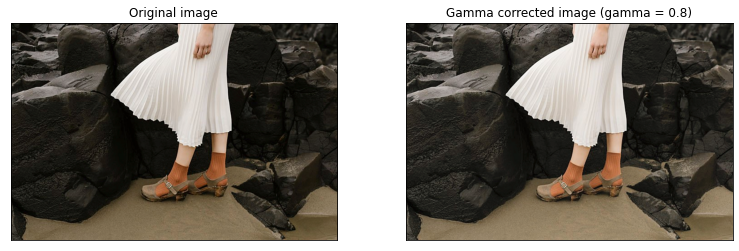

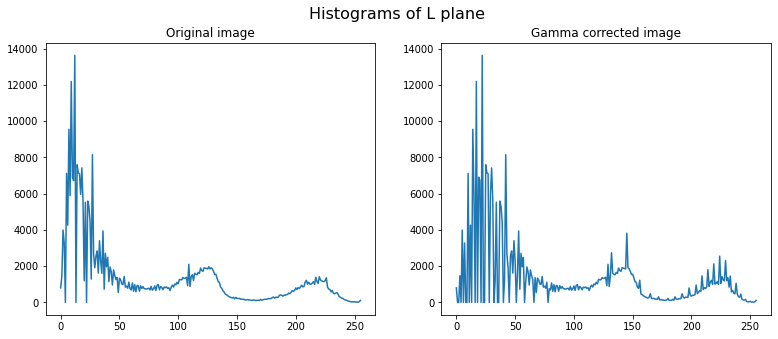

In [5]:
gamma = 0.8

fig3 = cv.imread(r"highlights_and_shadows.jpg")
assert fig3 is not None
fig3 = cv.cvtColor(fig3, cv.COLOR_BGR2Lab)
fig3_rbg = cv.cvtColor(fig3, cv.COLOR_Lab2RGB)
original_hist = cv.calcHist([fig3], [0], None, [256], [0, 256])
transform4 = np.array([((i/255)**gamma)*255 for i in range(256)]).astype(np.uint8)
fig3[:,:,0] = cv.LUT(fig3[:,:,0], transform4)
transformed_hist = cv.calcHist([fig3], [0], None, [256], [0, 256])
fig3 = cv.cvtColor(fig3, cv.COLOR_Lab2RGB)

fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].imshow(fig3_rbg)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original image")
ax[1].imshow(fig3)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Gamma corrected image (gamma = "+str(gamma)+")")

fig, ax = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Histograms of L plane', fontsize=16)
ax[0].plot(original_hist)
ax[0].set_title("Original image")
ax[1].plot(transformed_hist)
ax[1].set_title("Gamma corrected image")

plt.show()

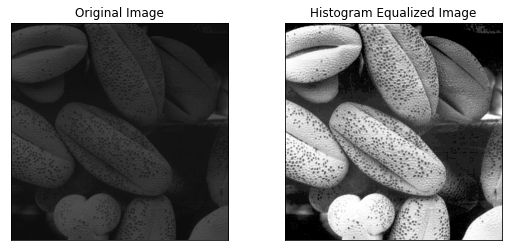

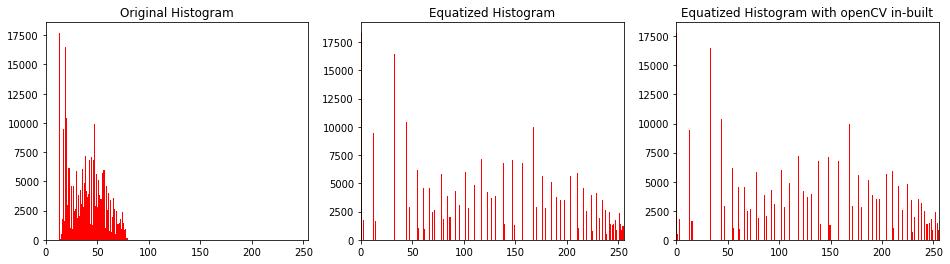

In [6]:
def equalizeHist(img):
    hist = np.histogram(img.flatten(),256,[0,256])[0]
    cdf = hist.cumsum()
    cdf = np.ma.masked_equal(cdf,0)
    cdf = (cdf - cdf.min())*255/(cdf.max()-cdf.min())
    cdf = np.ma.filled(cdf,0).astype('uint8')
    img_equatized = cv.LUT(img, cdf)

    return img_equatized
fig4 = cv.imread("shells.png", cv.IMREAD_GRAYSCALE)
assert fig4 is not None

fig4_equatized = equalizeHist(fig4)
fig4_equatized_inbuilt = cv.equalizeHist(fig4)

fig, ax = plt.subplots(1, 2, figsize=(9, 4))
ax[0].imshow(fig4, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original Image")
ax[1].imshow(fig4_equatized, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Histogram Equalized Image")


fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].hist(fig4.flatten(),256,[0,256], color = 'r')
ax[0].set_xlim([0, 255])
ax[0].set_title("Original Histogram")
ax[1].hist(fig4_equatized.flatten(),256,[0,256], color = 'r')
ax[1].set_xlim([0, 255])
ax[1].set_title("Equatized Histogram")
ax[2].hist(fig4_equatized_inbuilt.flatten(),256,[0,256], color = 'r')
ax[2].set_xlim([0, 255])
ax[2].set_title("Equatized Histogram with openCV in-built")


plt.show()

In [7]:
def zoom(img, factor, mode="nn"):
    rows, cols = int(factor*img.shape[0]),  int(factor*img.shape[1])
    zoomed = np.zeros((rows, cols, img.shape[2]), img.dtype)
    old_x, old_y = img.shape[0], img.shape[1]
    if mode=="nn":
        for i in range(rows):
            for j in range(cols):
                x, y = i/factor, j/factor
                x = int(min( old_x - 1, round(x)))
                y = int(min(old_y - 1, round(y)))
                zoomed[i, j] = img[x, y]

    elif mode=="bl":
        for i in range(rows):
            for j in range(cols):
                x, y = i/factor, j/factor
                x_floor = int(np.floor(x))
                x_ceil = int(min( old_x - 1, np.ceil(x)))
                y_floor = int(np.floor(y))
                y_ceil = int(min(old_y - 1, np.ceil(y)))

                if (x_ceil == x_floor) and (y_ceil == y_floor):
                    q = img[int(x), int(y), :]

                elif (x_ceil == x_floor):
                    q1 = img[int(x), int(y_floor), :]
                    q2 = img[int(x), int(y_ceil), :]
                    q = q1 * (y_ceil - y) + q2 * (y - y_floor)

                elif (y_ceil == y_floor):
                    q1 = img[int(x_floor), int(y), :]
                    q2 = img[int(x_ceil), int(y), :]
                    q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))

                else:
                    v1 = img[x_floor, y_floor, :]
                    v2 = img[x_ceil, y_floor, :]
                    v3 = img[x_floor, y_ceil, :]
                    v4 = img[x_ceil, y_ceil, :]

                    q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
                    q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
                    q = q1 * (y_ceil - y) + q2 * (y - y_floor)

                zoomed[i, j, :] = q

    return zoomed

im = cv.imread(r"a1q5images\im01.png")
im_given = cv.imread(r"a1q5images\im01small.png")


im_zoomed = zoom(im, 0.25, "bl")

im_zoomed = im_zoomed*im_zoomed
im_given = im_given*im_given
a, b, c = im_given.shape

print(np.sum(im_given-im_zoomed)/(a*b*c))

108.55665895061729


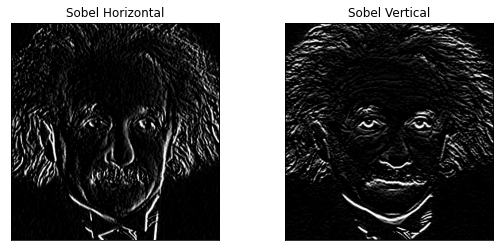

In [8]:
fig_einstein = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)
assert fig_einstein is not None

sobel_horizontal = np.array(((1, 0, -1), (2, 0, -2), (1, 0, -1)))
sobel_vertical = np.array(((-1, -2, -1), (0, 0, 0), (1, 2, 1)))
horizontally_filtered = cv.filter2D(fig_einstein, -1, sobel_horizontal)
verically_filtered = cv.filter2D(fig_einstein, -1, sobel_vertical)

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].imshow(horizontally_filtered, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Sobel Horizontal")
ax[1].imshow(verically_filtered, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Sobel Vertical")

plt.show()

In [9]:
fig_daisy = cv.imread("daisy.jpg")
assert fig_daisy is not None

mask = np.zeros(fig_daisy.shape[:2], np.uint8)
rect, fgModel, bgModel = (50,100,550,560), np.zeros((1, 65), np.float64), np.zeros((1, 65), np.float64)

mask, bgModel, fgModel = cv.grabCut(fig_daisy, mask, rect, bgModel, fgModel, 5, mode=cv.GC_INIT_WITH_RECT)

outputMask = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8)
output = fig_daisy*outputMask[:,:,np.newaxis]

cv.imshow("", output)
cv.waitKey(0)

cv.destroyAllWindows()